## Back ground

<p align="center">
    <img src="https://www.shutterstock.com/image-vector/banner-best-offer-260nw-706166626.jpg"  width="400" height="60">
</p>



This section aims to find the best offer for each user based on past experiments. The notebook contains the following main sections: loading data, training an XGBRegressor model on the experiment results, assigning optimal values, and saving assignments for future analysis.

For a summary and discussion of the different steps, please review the `README.md` file.

To test the results on new data:

1. Skip the model training and tuning section (as it may take a long time) and load the data and model, which can be found in the models and data directories, respectively.
2. Ensure that the data has the same structure as the data found in the data directory.

## Import Functionality

In [1]:
from utils import (get_data,train_and_tune_xgboost_regressor,save_model,
                   load_model,assign_treatment,save_optimal_treatment_as_json,plot_feature_importance,
                   dictionry_to_class)
from sklearn.metrics import mean_squared_error

## Set configs

In [18]:
#Define the configurations as a dictionary (*for further research, it is preferable to move it into a separate file out of the code).

configs_dict = dict(train_data_path = "data/train_home_assignment_.csv",
                    test_data_path = "data/test_home_assignment.csv",
                   target_col = "org_price_usd_following_30_days_after_impact",
                   columns_to_drop = ["org_price_usd_following_30_days"],
                   models_directory = "models",
                   model_name = "xbg_regressor_model_task2",
                   time_format = "%Y_%m_%d-%H_%M_%S",
                   model_file_type = "json",
                   model_path = "models/xbg_regressor_model_task2_2023_04_14-12_26_20.json",
                   treatment_col_name = "treatment",
                   new_treatment_col_name = "optimal_treatment",
                   data_directory = "data",
                   treatment_values = [2,10])

# Convert dictionary into class 
configs = dictionry_to_class(configs_dict)

# Get data 

In [3]:
# Load data, remove unnecessary columns, split to train test 
X_train, y_train = get_data(path = configs.train_data_path, 
                            target_col = configs.target_col, 
                            columns_to_drop = configs.columns_to_drop,
                            test_size = 0)

In [4]:
# Load data, remove unnecessary columns, split to train test 
X_test = get_data(path = configs.test_data_path, 
                  target_col = configs.target_col, 
                  columns_to_drop = configs.columns_to_drop,
                  test_size = 0)

### Transormation, training and tuning


For testing on nee data, skip the model training and tuning section (**as it may take a long time**) and load the data and model, which can be found in the models and data directories, respectively.

<p align="center">
    <img src="https://media.licdn.com/dms/image/C5112AQFd4E7xHBD7dw/article-inline_image-shrink_1000_1488/0/1520169270725?e=1686182400&v=beta&t=h_8hxM8WUqitvDX4WGcQlqpWLiZyeUIsKDEQmR1DAAY"  width="100" height="40">
</p>




In [5]:
# Run data trasformation, grid search and cross validation
grid_search = train_and_tune_xgboost_regressor(X_train = X_train,
                                               y_train= y_train,
                                               numeric_cols = X_train.columns, 
                                               loss = 'squarederror',
                                               verbose = 0)

### Save and load model

In [6]:
# Save model as json
save_model(model = grid_search,
           directory = configs.models_directory,
           name = configs.model_name,
           time_format = configs.time_format,
           file_type = configs.model_file_type)


In [19]:
# Load model
xgb_regressor = load_model(model_path = configs.model_path)

# Assign values 

In [33]:
# Assigning values with maximize the target variable
X_test_new = assign_treatment(df = X_test,
                               model = xgb_regressor,
                               treatment_values = configs.treatment_values, 
                               past_col_name = configs.treatment_col_name, 
                               new_col_name = configs.new_treatment_col_name)


<p align="center">
    <img src="https://media.tenor.com/4ZgDQzw4lg4AAAAM/value-added-check.gif"  width="200" height="60">
</p>


### Save optimal treatment 

In [45]:
# Save optimal treatment for future analysis
save_optimal_treatment_as_json(data = X_test_new,
                               col = configs.new_treatment_col_name,
                               directory = configs.data_directory,
                               file_name = configs.new_treatment_col_name)

# Summary

The `README.md` file will provide a discussion of the following results:

In [46]:
(X_test_new.treatment_10_predition  ==  X_test_new.treatment_2_predition).sum()

144983

In [47]:
X_test_new["optimal_treatment"].value_counts()

10    145051
2      54949
Name: optimal_treatment, dtype: int64

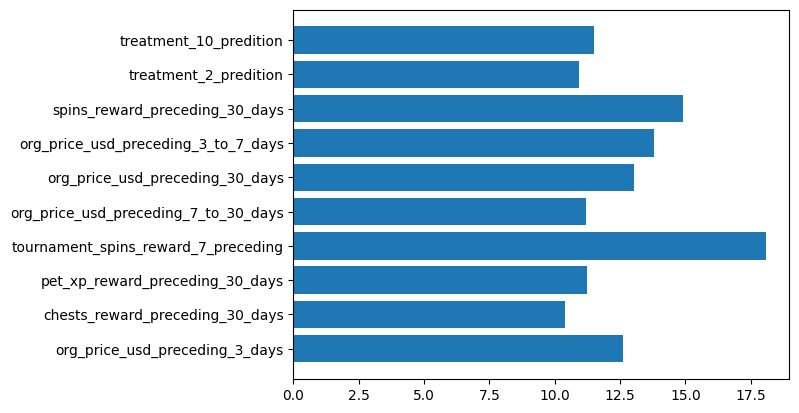

In [142]:
plot_highest_features_diffs(X_test)